In [51]:
import torch 
from torch import nn
import torchvision
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
from torch.utils.data import DataLoader
from torchvision import transforms, datasets
import torch.nn.functional as F
from sklearn.metrics import confusion_matrix
from tqdm import tqdm
import pandas as pd

In [52]:
class Config:
    def __init__(self):
        self.ROOD_DATA_DIR="ImageDir"
        self.EPOCH=30
        self.BATCH_SIZE=32
        self.LEARNING_RATE=0.01
        self.IMAGE_SIZE=(28,28)
        self.DEVICE="cuda" if torch.cuda.is_available() else "cpu"
        print(f"this notebook is using device: {self.DEVICE}")
        self.SEED=42
config=Config()

this notebook is using device: cpu


In [53]:
train_data=datasets.FashionMNIST(
    root=config.ROOD_DATA_DIR,
    train=True,
    download=True,
    transform=transforms.ToTensor()
)
test_data=datasets.FashionMNIST(
    root=config.ROOD_DATA_DIR,
    train=False,
    download=True,
    transform=transforms.ToTensor()

)

In [54]:
train_data.data.shape

torch.Size([60000, 28, 28])

In [55]:
test_data.data.shape

torch.Size([10000, 28, 28])

In [56]:
train_data.class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [57]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [58]:
given_lavel_map=train_data.class_to_idx
given_lavel_map

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [59]:
lavel_map={key:val for key, val in given_lavel_map.items()}
lavel_map

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [60]:
label_map={val:key for key, val in given_lavel_map.items()}
label_map

{0: 'T-shirt/top',
 1: 'Trouser',
 2: 'Pullover',
 3: 'Dress',
 4: 'Coat',
 5: 'Sandal',
 6: 'Shirt',
 7: 'Sneaker',
 8: 'Bag',
 9: 'Ankle boot'}

In [61]:
train_data.targets[0].item()

9

(-0.5, 27.5, 27.5, -0.5)

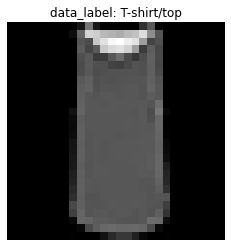

In [62]:
idx=2
plt.imshow(train_data.data[idx], cmap="gray")

plt.title(f"data_label: {label_map[train_data.targets[idx].item()]}")
plt.axis("off")


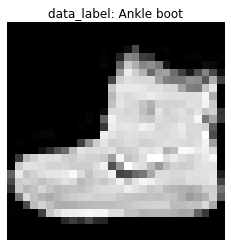

In [63]:
def view_sample_img(data, idx, label_map):
    plt.imshow(data.data[idx], cmap="gray")
    plt.title(f"data_label: {label_map[data.targets[idx].item()]}")
    plt.axis("off")
view_sample_img(train_data, 0, label_map)

# Create data loader

In [64]:
train_data_loader=DataLoader(
    dataset=train_data,
    batch_size=config.BATCH_SIZE,
    shuffle=True
)
test_data_loader=DataLoader(
    dataset=test_data,
    batch_size=config.BATCH_SIZE,
    shuffle=False
)

In [65]:
for images, labels in train_data_loader:
    print(images.shape)
    print(labels.shape)
    break

torch.Size([32, 1, 28, 28])
torch.Size([32])


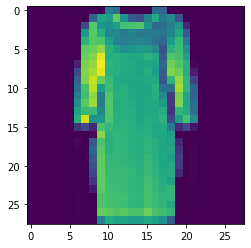

In [66]:
plt.imshow(images[0].permute(1,2,0))

In [67]:
images[0].shape

torch.Size([1, 28, 28])

In [68]:
images[0].squeeze().shape

torch.Size([28, 28])

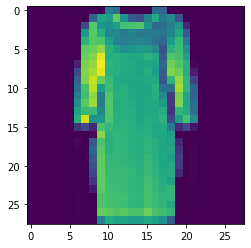

In [69]:
plt.imshow(images[0].squeeze().numpy())

# Define CNN Architecture

In [70]:
class CNN(nn.Module):
    def __init__(self, in_, out_):
        super(CNN, self).__init__()
        self.conv_pool_01=nn.Sequential(
            nn.Conv2d(in_channels=in_, out_channels=8, kernel_size=5, stride=1, padding=0),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.conv_pool_02=nn.Sequential(
            nn.Conv2d(in_channels=8, out_channels=16, kernel_size=5, stride=1, padding=0),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.Flatten=nn.Flatten()
        self.FC_01=nn.Linear(in_features=16*4*4, out_features=128)
        self.FC_02=nn.Linear(in_features=128, out_features=64)
        self.FC_03=nn.Linear(in_features=64, out_features=out_)
                                        
    def forward(self,x):
        x=self.conv_pool_01(x)
        x=self.conv_pool_02(x)
        x=self.Flatten(x)
        x=F.relu(x)
        x=self.FC_01(x)
        x=F.relu(x)
        x=self.FC_02(x)
        x=F.relu(x)
        x=self.FC_03(x)
        x=F.relu(x)
        return x

In [71]:
model=CNN(1,10)
print(model)

CNN(
  (conv_pool_01): Sequential(
    (0): Conv2d(1, 8, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_pool_02): Sequential(
    (0): Conv2d(8, 16, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (Flatten): Flatten(start_dim=1, end_dim=-1)
  (FC_01): Linear(in_features=256, out_features=128, bias=True)
  (FC_02): Linear(in_features=128, out_features=64, bias=True)
  (FC_03): Linear(in_features=64, out_features=10, bias=True)
)


In [72]:
model.conv_pool_01

Sequential(
  (0): Conv2d(1, 8, kernel_size=(5, 5), stride=(1, 1))
  (1): ReLU()
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
)

In [73]:
model.FC_03

Linear(in_features=64, out_features=10, bias=True)

In [74]:
model.to(config.DEVICE)

CNN(
  (conv_pool_01): Sequential(
    (0): Conv2d(1, 8, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_pool_02): Sequential(
    (0): Conv2d(8, 16, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (Flatten): Flatten(start_dim=1, end_dim=-1)
  (FC_01): Linear(in_features=256, out_features=128, bias=True)
  (FC_02): Linear(in_features=128, out_features=64, bias=True)
  (FC_03): Linear(in_features=64, out_features=10, bias=True)
)

next(model.parameters()).is_cuda

# Count the number of parameters

In [75]:
def count_params(model):
    model_params={"Modules":list(),"Parameters":list()}
    total={"trainable":0, "non_trainable":0}
    for name, parameters in model.named_parameters():
        param=parameters.numel()
        if not parameters.requires_grad:
            
            
            total["non_trainable"] +=param
            continue
        model_params["Modules"].append(name)  
        model_params["Parameters"].append(param)
        total["trainable"] +=param
    df=pd.DataFrame(model_params)
    df=df.style.set_caption(f"Total trainable parameters: {total}")
    return df
count_params(model)
        

,Modules,Parameters
0,conv_pool_01.0.weight,200
1,conv_pool_01.0.bias,8
2,conv_pool_02.0.weight,3200
3,conv_pool_02.0.bias,16
4,FC_01.weight,32768
5,FC_01.bias,128
6,FC_02.weight,8192
7,FC_02.bias,64
8,FC_03.weight,640
9,FC_03.bias,10


# Training_loop

In [34]:
criterion=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model.parameters(), lr=config.LEARNING_RATE)

In [76]:
for epoch in range(config.EPOCH):
    with tqdm(train_data_loader) as tqdm_epoch:
        for images, labels in tqdm_epoch:
            tqdm_epoch.set_description(f"Epoch {epoch+1}/{config.EPOCH}")
            # put the images on device
            images.to(config.DEVICE)
            labels.to(config.DEVICE)
            #Forward pass
            outputs=model(images)# images->batch of images
            loss=criterion(outputs, labels)# passing the predicted and target
            # backward propa
            optimizer.zero_grad()
            loss.backward()# calculate the gradients
            optimizer.step()# weights updated here
            tqdm_epoch.set_postfix(loss=loss.item())

Epoch 30/30: 100%|█████████████| 1875/1875 [00:46<00:00, 40.03it/s, loss=2.31]


##  Save our model

In [77]:
import os

In [79]:
os.makedirs("model_dir", exist_ok=True)
model_file=os.path.join("model_dir", "CNN_model_1.pth")
torch.save(model, model_file)

# load the model

In [80]:
loaded_model=torch.load(model_file)

# Evaluate the model

In [94]:
pred=np.array([])
target=np.array([])

with torch.no_grad():
    for batch, data in enumerate(test_data_loader):
        images=data[0].to(config.DEVICE)
        labels=data[1].to(config.DEVICE)
        y_pred=model(images)
        pred=np.concatenate((pred, torch.argmax(y_pred,dim=1).cpu().numpy()))#1->accros the dimension 1
        target=np.concatenate((target, labels.cpu().numpy()))

In [95]:
cm=confusion_matrix(target, pred)
cm

array([[   0,    0,    0,    0,    0,    0, 1000,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0, 1000,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0, 1000,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0, 1000,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0, 1000,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0, 1000,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0, 1000,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0, 1000,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0, 1000,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0, 1000,    0,    0,    0]],
      dtype=int64)

In [93]:
pred = np.array([])
target = np.array([])

with torch.no_grad():
  for batch, data in enumerate(test_data_loader):
    images = data[0].to(config.DEVICE)
    labels = data[1].to(config.DEVICE)

    y_pred = model(images)

    pred = np.concatenate((pred, torch.argmax(y_pred, 1).cpu().numpy()))
    target = np.concatenate((target, labels.cpu().numpy()))

In [84]:
cm = confusion_matrix(target, pred)

In [85]:
cm

array([[   0,    0,    0,    0,    0,    0, 1000,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0, 1000,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0, 1000,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0, 1000,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0, 1000,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0, 1000,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0, 1000,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0, 1000,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0, 1000,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0, 1000,    0,    0,    0]],
      dtype=int64)

<AxesSubplot:>

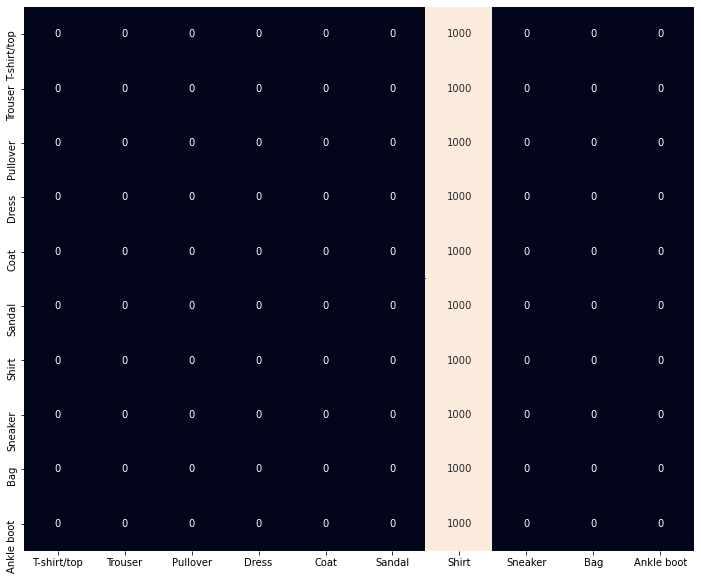

In [86]:
plt.figure(figsize=(12,10))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=label_map.values() , yticklabels=label_map.values(), cbar=False)